In [18]:
#İRİS VERİ SETİ İLE ÖRNEK UYGULAMA

In [19]:
#Gerekli kütüphaneleri import ediyoruz.

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn import datasets

In [21]:
# veriyi görselleştiriyoruz.

In [22]:
data = pd.read_csv("/Users/mustafacitak/Desktop/Python/DL_Calisma/Iris.csv")

print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [23]:
#Verinin boyutlarını inceliyoruz.

In [24]:
print ("Verinin boyutları: \n", data.shape)

Verinin boyutları: 
 (150, 6)


In [25]:
#veri setindeki hedef değişkeni "Species" sütunundan ayrılır ve "X" değişkenine atanır. 
#Yani, "X" değişkeni, veri setinin tüm sütunlarını içerir, ancak "Species" sütunu hariçtir.
#-----
#Ayrıca, hedef değişkenin sadece "Species" sütununu içeren "y" değişkeni oluşturulur. 
#Bu, modelin eğitim sırasında öğrenmesi gereken hedef değişkeni değerleridir. 
#"y" değişkeni, "Species" sütunundaki her satırın değerini içerir.

In [26]:
#sınıf özniteliğinin ayrılması
X = data.drop("Species", axis=1)
y = data["Species"]

In [27]:
#İlk olarak, LabelEncoder kullanarak sınıf etiketlerini sayısal formata dönüştürülmektedir. 
#Bu, her bir sınıf etiketini bir tamsayıya dönüştürmek anlamına gelir. 
#Bu adım, genellikle sınıflandırma algoritmalarının girdi olarak sayısal değerler beklemesi nedeniyle gereklidir.
#---------
#Sonra, to_categorical fonksiyonu kullanılarak bu sayısal etiketler one-hot encoding yöntemiyle dönüştürülür. 
#Bu, her bir sınıf etiketini bir vektöre dönüştürür, 
#böylece bir sınıf etiketi 0 ve 1'lerden oluşan bir vektör haline gelir. 
#Bu, çok sınıflı sınıflandırma problemlerinde kullanılan bir yaygın dönüşüm yöntemidir.

In [28]:
dönüştürüldü = LabelEncoder()
y = dönüştürüldü.fit_transform(y)
y = to_categorical(y)

In [29]:
#X ve y değişkenleri, genellikle özellikler ve hedef değişken olarak adlandırılan veri setinin özelliklerini
# ve hedef sütununu içerir. test_size=0.2 parametresi, veri setinin %20'sini test veri kümesi olarak ayırmak 
#için kullanılır. Bu, genellikle verinin %80'ini eğitimde ve %20'sini testte kullanmak için yapılır.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [31]:
#MinMaxScaler sınıfı, veri kümesindeki özellikleri belirli bir aralığa ölçeklemek için kullanılır. 
#Bu aralık, feature_range parametresiyle belirlenir. Varsayılan olarak, bu aralık (0, 1) olarak ayarlanmıştır.
#Bu, tüm özellik değerlerini 0 ile 1 arasına ölçekler.
#------
#fit_transform fonksiyonu, önce eğitim veri kümesine uygulanır (X_train),
#ardından test veri kümesine uygulanır (X_test). Bu işlem, 
#her iki veri kümesinin özelliklerini aynı ölçekleme aralığına getirir, 
#böylece modelin daha iyi eğitilmesi ve doğru sonuçlar elde edilmesi sağlanır.

In [32]:
işlem = MinMaxScaler(feature_range = (0, 1))
X_train = işlem.fit_transform(X_train)
X_test = işlem.fit_transform(X_test)

In [33]:
#Keras Modelleme

In [34]:
#Sequential sınıfı, sıralı bir model oluşturmak için kullanılır. 
#Bu model, katmanlarının sırasına göre birbirine bağlıdır.
#------
#Dense sınıfı, tam bağlantılı (fully connected) bir katman oluşturur. 
#İlk parametre, katmandaki nöron sayısını belirtir. 
#İkinci parametre, katmanın girdi şeklini belirtir. 
#input_shape parametresi, katmanın girdi şeklini belirler. 
#Bu örnekte, girdi şekli (5,) şeklindedir, yani 5 özellikten oluşan bir giriş vektörü beklenir.
#Üçüncü parametre, katmanın aktivasyon fonksiyonunu belirtir. 
#Bu örnekte, "relu" (Rectified Linear Unit) aktivasyon fonksiyonu kullanılmıştır. 
#"relu" fonksiyonu, negatif girişleri sıfır olarak, pozitif girişleri ise doğrudan döndürerek etkinleştirir.
#------
#Modelin ikinci katmanında, 64 nörona sahip bir gizli katman kullanılır. 
#Bu katmanın girişi, ilk katmandan gelen çıktıdır.
#Bu katman da "relu" aktivasyon fonksiyonunu kullanır.
#--------
#Modelin üçüncü katmanı, 3 nörona ve "softmax" aktivasyon fonksiyonuna sahip bir çıkış katmanıdır. 
#Bu katman, veri kümesindeki sınıf sayısına (3) göre ayarlanır ve modelin sınıflandırma yapmasını sağlar.
#"softmax" fonksiyonu, çıktıları olasılık dağılımına dönüştürür ve en yüksek olasılığa sahip sınıfı seçer.


In [35]:
model = Sequential([
    Dense(32, input_shape=(5,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [36]:
#Keras ile oluşturulan bir modelin özetini görüntüler.
#Bu özet, modelin katmanlarını, her katmandaki nöron sayısını,
#katmanların parametre sayısını ve toplam parametre sayısını içerir.
#-----
#Bu örnekte, modelin adı "sequential_5" olarak belirlenmiştir.
#Modelde toplam 3 katman bulunmaktadır: 
#İlk katmanda 32 nöron, ikinci katmanda 64 nöron ve üçüncü katmanda 3 nöron bulunmaktadır. 
#Toplamda 2,499 parametre (ağırlıklar ve biaslar) vardır. 
#Bu parametreler, eğitim sırasında güncellenirken kullanılır.

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
#Keras modelini bir görselleştirme olarak kaydetmek için kullanılır. 
#Bu işlev bir modeli bir görselleştirme olarak kaydeder ve verilen dosya adıyla belirtilen bir dosyaya kaydeder.
#Ayrıca show_shapes ve show_layer_names parametreleri ile 
#katman şekillerini ve katman isimlerini gösterip göstermemeyi kontrol edebilirsiniz.

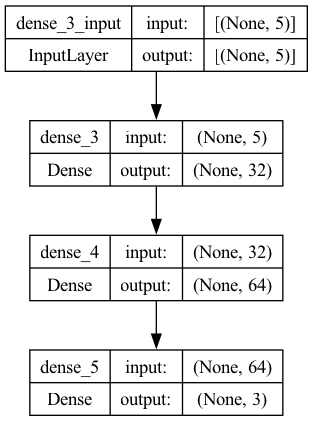

In [39]:
tf.keras.utils.plot_model(
    model, "Iris-model.png",
    show_shapes=True,
    show_layer_names=True)

In [40]:
#modelin derlenmesi

# model.compile() yöntemi, modelin derlenmesi için kullanılır.
#Derleme, modelin nasıl eğitileceğini tanımlar, hangi kayıp fonksiyonunun kullanılacağını, 
#hangi optimizasyon algoritmasının kullanılacağını ve hangi metriklerin izleneceğini belirler.

In [41]:
model.compile (
loss = "categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])

In [42]:
#Modelin egitilmesi

In [43]:
#Bu kodda, model, eğitim veri seti (X_train) ve hedef etiketler (y_train) üzerinde belirtilen 
#sayıda epoch (100) için eğitilir. Her epoch, eğitim verileri kullanılarak modelin ağırlıklarının 
#güncellenmesi ve modelin kaybını (loss) azaltması amaçlanır. "verbose" argümanı, eğitim sırasında
#gösterilen çıktının ayrıntı düzeyini kontrol eder. "batch_size" argümanı, her bir eğitim adımında 
#kullanılan örnek sayısını belirler. "validation_split" argümanı, eğitim veri setinin bir bölümünün 
#modelin performansını değerlendirmek için kullanılacağı yüzdeyi belirler. 
#Bu, eğitim sırasında modelin aşırı uyumunu (overfitting) kontrol etmek için kullanılır.
#batch_size: Her bir eğitim adımında kaç veri örneğinin kullanılacağını belirten bir tam sayı. 
#Örnekler küçük gruplar halinde ağa verilir ve her bir grup için bir güncelleme yapılır.

In [52]:
history = model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=16, validation_split=0.2)

Epoch 1/100
6/6 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 32ms/epoch - 5ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 10ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 12ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 9ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 9ms/epoch - 2ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 10ms/epoch - 2ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 9ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0027 

Epoch 67/100
6/6 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.2090e-04 - val_accuracy: 1.0000 - 9ms/epoch - 2ms/step
Epoch 68/100
6/6 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.3618e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 69/100
6/6 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.8473e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 70/100
6/6 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.6965e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 71/100
6/6 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.6667e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 72/100
6/6 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.8289e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 73/100
6/6 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.5005e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step
Epoch 74/100
6/6 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 5.3057e-04 - val_accuracy: 1.0000 - 9ms/epoch - 1ms/step


In [53]:
#Epoch 1'de, eğitim veri setinin yüzde 6.25'i doğru sınıflandırıldı ve 
#doğrulama (validation) veri setinin yüzde 20.83'ü doğru sınıflandırıldı. 
#İlk epoch'ta kayıp (loss) 1.1339, doğruluk (accuracy) 0.0625, doğrulama kaybı (val_loss) 1.1097 ve 
#doğrulama doğruluğu (val_accuracy) 0.2083 olarak hesaplandı.

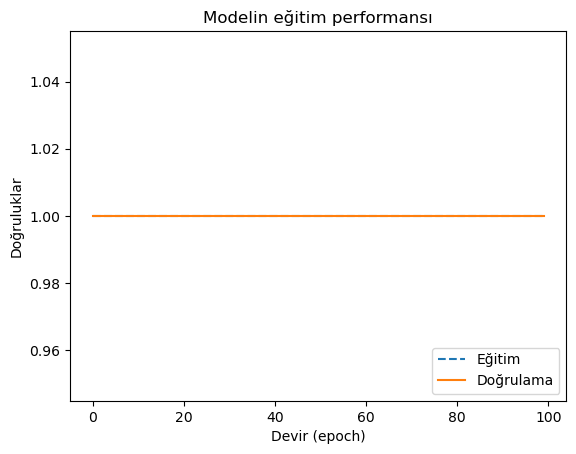

In [54]:
# Dogruluk ile ilgili grafik
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Modelin eğitim performansı")
plt.ylabel("Doğruluklar")
plt.xlabel("Devir (epoch)")
plt.legend(["Eğitim", "Doğrulama"], loc="lower right")
plt.show()

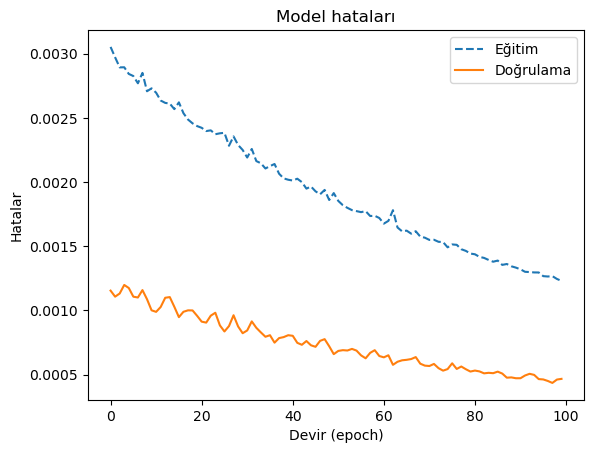

In [55]:
# Hata grafiği
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model hataları")
plt.ylabel("Hatalar")
plt.xlabel("Devir (epoch)")
plt.legend(["Eğitim", "Doğrulama"], loc="upper right")
plt.show()

In [56]:
# Test verisi ile performans ölçümü
scores = model.evaluate(X_test, y_test)
print("\nDoğruluk: ", scores[1])

1/1 [==============================] - 0s 14ms/step - loss: 0.0096 - accuracy: 1.0000

Doğruluk:  1.0
